![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)


[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/nlu/blob/master/examples/colab/component_examples/classifiers/intent_classification_airlines_ATIS.ipynb)

# Intent Classification with NLU

|Type | 	Description |
|------|--------------|
 | atis_airfare|air fares, like **500 $**
 | atis_ground_service|gorund services like, **Transporation**
 | atis_flight|aits flights like, **6B12**
 | atis_airline|atis airline like, **Emirates**
 | atis_abbreviation|atis abbreviations like,   **air fare q**
             
# What is the ATIS Dataset?
ATIS dataset provides large number of messages and their associated intents that can be used in training a classifier. Within a chatbot, intent refers to the goal the customer has in mind when typing in a question or comment. While entity refers to the modifier the customer uses to describe their issue, the intent is what they really mean. For example, a user says, ‘I need new shoes.’ The intent behind the message is to browse the footwear on offer. Understanding the intent of the customer is key to implementing a successful chatbot experience for end-user.
https://www.kaggle.com/hassanamin/atis-airlinetravelinformationsystem



In [ ]:
!wget https://setup.johnsnowlabs.com/nlu/colab.sh -O - | bash
  

import nlu

--2022-04-15 02:33:54--  https://setup.johnsnowlabs.com/nlu/colab.sh
Resolving setup.johnsnowlabs.com (setup.johnsnowlabs.com)... 51.158.130.125
Connecting to setup.johnsnowlabs.com (setup.johnsnowlabs.com)|51.158.130.125|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://raw.githubusercontent.com/JohnSnowLabs/nlu/master/scripts/colab_setup.sh [following]
--2022-04-15 02:33:54--  https://raw.githubusercontent.com/JohnSnowLabs/nlu/master/scripts/colab_setup.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1665 (1.6K) [text/plain]
Saving to: ‘STDOUT’

-                   100%[===================>]   1.63K  --.-KB/s    in 0s      

2022-04-15 02:33:55 (28.6 MB/s) - written to stdout [1665/1665]

Installing  NLU 

In [ ]:
# Download the dataset 
! wget http://ckl-it.de/wp-content/uploads/2021/01/atis_intents.csv


--2022-04-15 02:35:46--  http://ckl-it.de/wp-content/uploads/2021/01/atis_intents.csv
Resolving ckl-it.de (ckl-it.de)... 217.160.0.108, 2001:8d8:100f:f000::209
Connecting to ckl-it.de (ckl-it.de)|217.160.0.108|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 391936 (383K) [text/csv]
Saving to: ‘atis_intents.csv’

atis_intents.csv    100%[===================>] 382.75K   669KB/s    in 0.6s    

2022-04-15 02:35:47 (669 KB/s) - ‘atis_intents.csv’ saved [391936/391936]



# Predict Intent of Airline messages

In [ ]:
import nlu 
import pandas as pd

df = pd.read_csv("atis_intents.csv")
df.columns = ["flight","text"]

preds = nlu.load('en.classify.intent.airline').predict(df["text"],output_level='sentence')
preds

classifierdl_use_atis download started this may take some time.
Approximate size to download 21.1 MB
[OK!]
tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
[OK!]
sentence_detector_dl download started this may take some time.
Approximate size to download 354.6 KB
[OK!]


,intent,intent_confidence_confidence,sentence,sentence_embedding_use
0,atis_flight,0.999994,what flights are available from pittsburgh to ...,"[0.037106938660144806, 0.0727505013346672, -0...."
1,atis_flight,0.999997,what is the arrival time in san francisco for ...,"[0.020266082137823105, 0.044293809682130814, -..."
2,atis_airfare,0.997928,cheapest airfare from tacoma to orlando,"[0.05529679358005524, 0.0694049745798111, -0.0..."
3,atis_airfare,1.0,round trip fares from pittsburgh to philadelph...,"[0.044724948704242706, 0.07032939791679382, -0..."
4,atis_flight,0.999996,i need a flight tomorrow from columbus to minn...,"[-0.0009330636239610612, 0.0720256119966507, -..."
...,...,...,...,...
4972,atis_airfare,0.999503,what is the airfare for flights from denver to...,"[0.015531656332314014, 0.06927467882633209, -0..."
4973,atis_flight,0.999994,do you have any flights from denver to baltimo...,"[0.03598876670002937, 0.06490834802389145, -0...."
4974,atis_airline,1.0,which airlines fly into and out of denver,"[0.0314473956823349, 0.0699605792760849, -0.06..."
4975,atis_flight,0.994565,does continental fly from boston to san franci...,"[0.01851840876042843, 0.07567648589611053, -0...."


# Plot Distribution of Intent in Messages

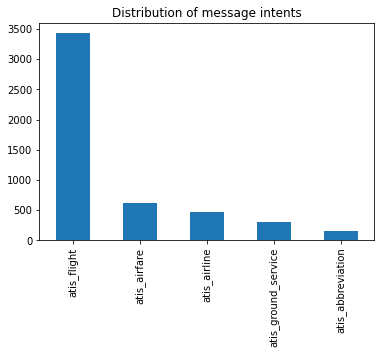

In [ ]:
preds.intent.value_counts().plot.bar(title='Distribution of message intents')